In [18]:
import datetime

import numpy             as np
import matplotlib.pyplot as plt

from CCfun  import in_range
from CCfun  import filter_df
from CCfun  import longer_than_exwl
from CCfun  import find_crystal_position
from CCfun  import remove_spikes
from CCfun  import is_saturated

from CCfit  import fit
from CCfit  import polynom
from CCfit  import gauss_poly
from CCfit  import double_gauss_poly
from CCfit  import triple_gauss_poly

from CCplot import auto_plot_style
from CCplot import plot1d
from CCplot import plot2d

from CCio import load_and_process

In [19]:
%matplotlib inline

auto_plot_style({"lines.linewidth": 2, "font.size":20})

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
def load(filename, i):
    print(filename)
    df = load_and_process(filename, i).crystals
    df = filter_df(df, crystal=7)
    return df.groupby("state", as_index=False)\
             .apply(remove_spikes)\
             .reset_index(drop=True)

# All data

In [22]:
filename = "/home/gonzalo/data/CC/cawo4_first_2020_06_08_17_50_36_269000.h5"
df       = load(filename, 0)

/home/gonzalo/data/CC/cawo4_first_2020_06_08_17_50_36_269000.h5


In [23]:
df.head()

full_scan  crystal  grating  exp_index  slit_width  state  exposure  ex_wl  \
0       True        7        2          0        1000      0       0.2  800.0   
1       True        7        2          0        1000      0       0.2  800.0   
2       True        7        2          0        1000      0       0.2  800.0   
3       True        7        2          0        1000      0       0.2  800.0   
4       True        7        2          0        1000      0       0.2  800.0   

          power           timestamp  em_wl  counts crystal_id crystal_type  \
0  4.433830e-07 2020-06-08 15:54:12  833.5  3078.0      cawo4         None   
1  4.433830e-07 2020-06-08 15:54:12  834.0  3081.0      cawo4         None   
2  4.433830e-07 2020-06-08 15:54:12  834.5  3058.0      cawo4         None   
3  4.433830e-07 2020-06-08 15:54:12  835.0  3074.0      cawo4         None   
4  4.433830e-07 2020-06-08 15:54:12  835.5  3076.0      cawo4         None   

   bkgsub  rate       quantar       dquanta  wheel_no  
0    11.0  55.0  1.785830e+14  3.079800e-13         0  
1     2.0  10.0  1.785830e+14  5.599637e-14         0  
2   -11.0 -55.0  1.785830e+14 -3.079800e-13         0  
3     7.0  35.0  1.785830e+14  1.959873e-13         0  
4     9.0  45.0  1.785830e+14  2.519837e-13         0

# All wavelengths

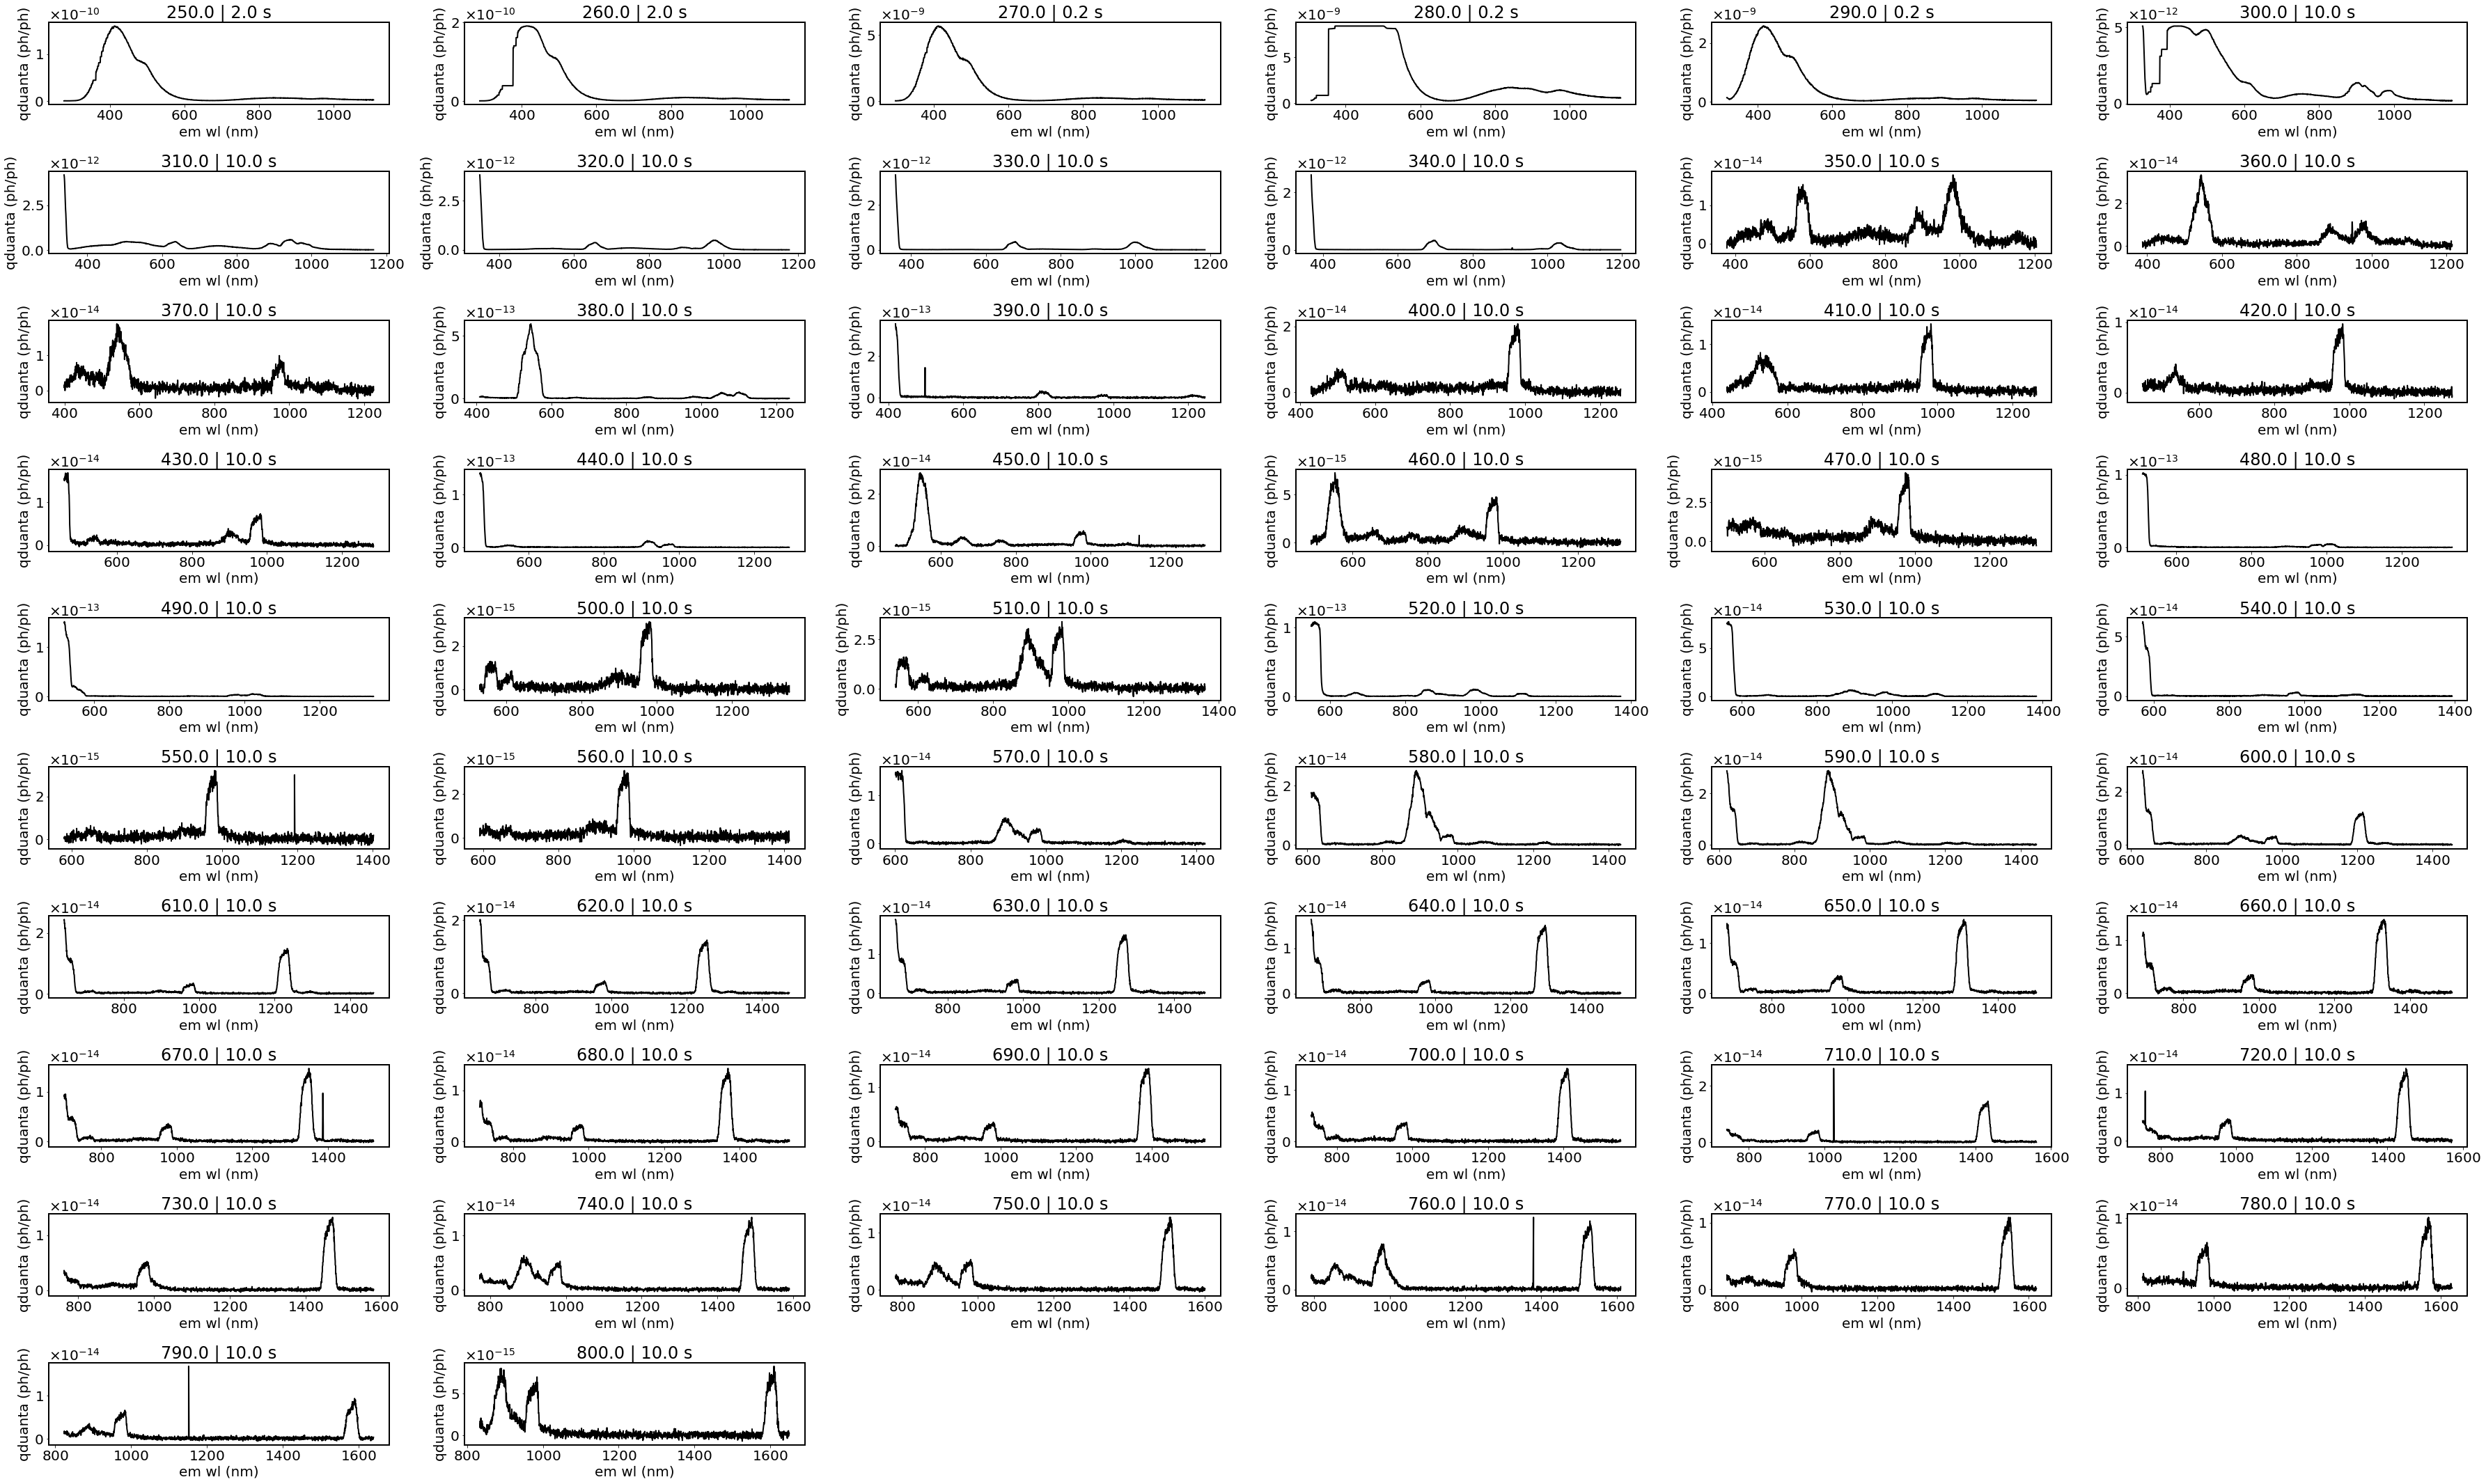

In [39]:
plt.figure(figsize=(10*5, 6*5))

groups = df.groupby("ex_wl")

for k, (ex_wl, exposures) in enumerate(groups, start=1):
    plt.subplot(10, 6, k)

    exposures = exposures.loc[exposures.grating == 1 + int(ex_wl >= 400)]
    
    for exp, data in sorted(exposures.groupby("exposure"), reverse=True):
        if not is_saturated(data.counts):
            break
    
    plt.plot(data.em_wl, data.dquanta, lw=2)

    plt.xlabel("em wl (nm)")
    plt.ylabel("qduanta (ph/ph)")
    plt.title (f"{ex_wl} | {exp} s")

plt.tight_layout()
plt.savefig("/home/gonzalo/Escritorio/cawo4.pdf")